In [1]:
import pandas as pd
#from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.decomposition import PCA
import nltk

from hdbscan import HDBSCAN

#from cluster import ClusterVerbs
from eval_tensor import VerbTensorEvaluator

import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (8, 4)

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.cluster import SpectralClustering, MeanShift

In [3]:
evalor = VerbTensorEvaluator()#cutoff=300000, non_negative=True)

In [4]:
evalor.load_embeddings()

# Clustering

In [5]:
mapper = UMAP(n_components=32, metric='cosine')

In [6]:
clusser = HDBSCAN(min_cluster_size=10, min_samples=5)

In [7]:
lowdim_vecs = mapper.fit_transform(evalor.decomped_tns.factors[1])

In [8]:
df = pd.DataFrame(evalor.index['ROOT'], columns=['verb'])

In [9]:
%time df['cluster'] = clusser.fit_predict(lowdim_vecs)

CPU times: user 98.7 ms, sys: 0 ns, total: 98.7 ms
Wall time: 98.3 ms


In [10]:
pd.set_option('lw',83-15)

In [12]:
print(pd.DataFrame.from_records([(i, ', '.join(df[df.cluster==i].verb.values))
                           for i in df.groupby('cluster').size().sort_values(ascending=False).index[:16]],
                          columns=['cluster', 'verbs'], index='cluster').to_latex())

\begin{tabular}{ll}
\toprule
{} &                                                                verbs \\
cluster &                                                                      \\
\midrule
-1      &  be, go, take, come, give, look, work, provide, help, show, inclu... \\
 45     &  meet, understand, drive, carry, perform, complete, finish, ident... \\
 5      &  kill, catch, shoot, feed, email, marry, wake, date, judge, bless... \\
 20     &  care, listen, gon, complain, pray, dream, wan, subscribe, swear,... \\
 27     &  break, push, lay, stick, roll, touch, press, suck, kick, shake, ... \\
 1      &  commit, expose, separate, heal, distinguish, kid, free, devote, ... \\
 4      &  run, leave, open, enter, visit, fill, close, reserve, clean, cro... \\
 6      &  tell, ask, call, thank, please, join, contact, draw, become, ass... \\
 42     &  add, eat, prepare, drink, spread, cook, burn, taste, smell, pour... \\
 29     &  check, view, click, display, generate, update, access,

# Levin

In [5]:
from nltk.corpus import verbnet as vn

In [6]:
mapper = UMAP(n_components=2, metric='cosine')

In [7]:
verb_mx = mapper.fit_transform(evalor.decomped_tns.factors[1])

In [8]:
df = pd.DataFrame(evalor.index['ROOT'], columns=['verb'])

In [9]:
df['vnet'] = df.verb.apply(lambda verb: vn.classids(lemma=verb))

In [10]:
df = df.reset_index()

In [11]:
plt.rcParams['figure.figsize'] = [16, 8]

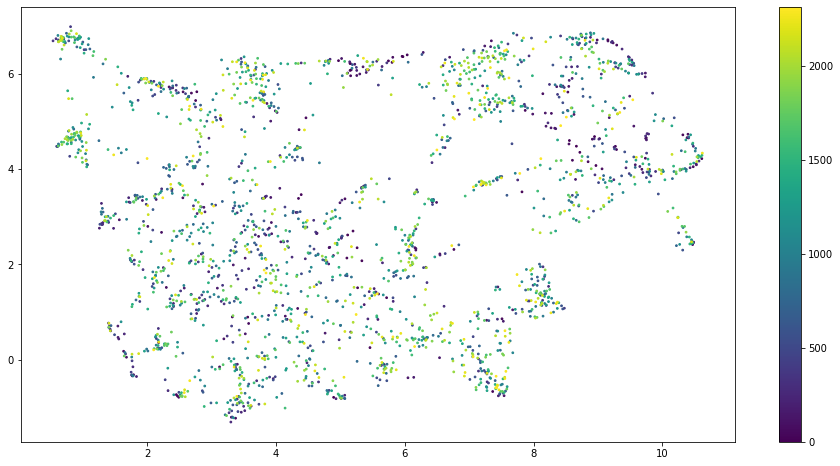

In [12]:
plt.scatter(*verb_mx.T[0:], s=3, c=df.index)
plt.colorbar()

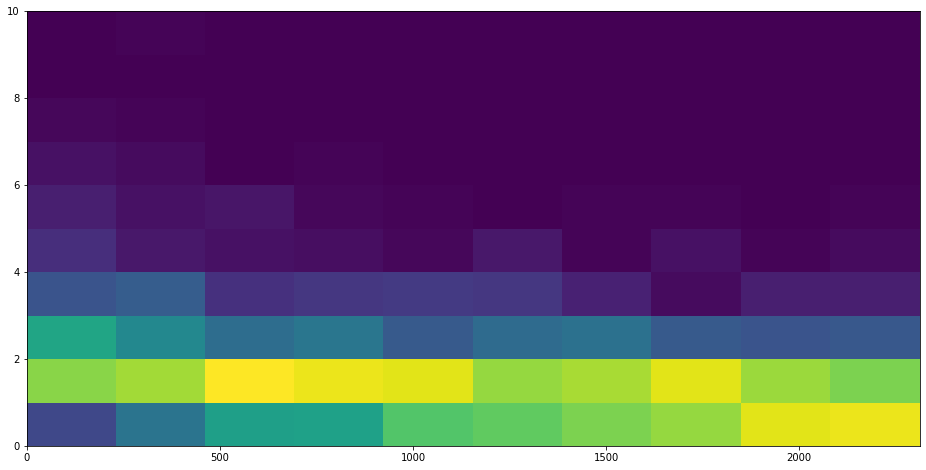

In [13]:
_ = plt.hist2d(df.index, df.vnet.str.len())

In [14]:
def least_class(classes):
    if classes:
        return min([int(class_.split('-')[1].split('.')[0]) for class_ in classes])
    else:
        return np.nan

In [35]:
df['least_class'] = df.vnet.apply(least_class)

In [16]:
df = df.fillna(df.least_class.max()+1)

In [22]:
df[df.vnet.str.len()==0].head()

,index,verb,vnet,least_class
0,0,be,[],95.0
1,1,have,[],95.0
2,2,do,[],95.0
39,39,seem,[],95.0
77,77,decide,[],95.0


In [27]:
ser = df.groupby('least_class').size()

In [29]:
ser.name = 'lclass_size'

In [31]:
df = df.set_index('least_class').join(ser)

In [19]:
df[df.least_class==9].head()

,index,verb,vnet,least_class
33,33,put,[put-9.1-2],9.0
72,72,set,"[braid-41.2.2, force-59-1, image_impression-25...",9.0
102,102,stand,"[admire-31.2, assuming_position-50, put_spatia...",9.0
120,120,cover,"[contiguous_location-47.8, fill-9.8]",9.0
126,126,sit,"[assuming_position-50, put_spatial-9.2-1, spat...",9.0


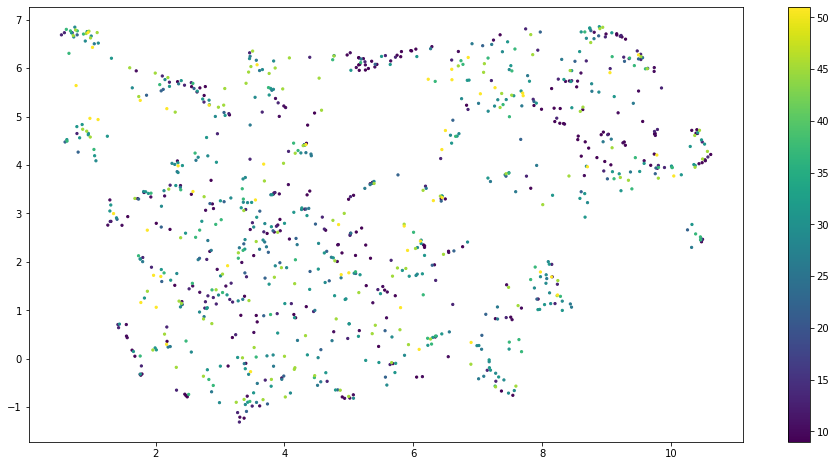

In [40]:
part = (df.lclass_size > 50).values
plt.scatter(*verb_mx[part].T, s=5, c=df.least_class[part])#==9)
plt.colorbar()

In [21]:
cv = ClusterVerbs(weight='log_freq', rank=128, cutoff=100, clusser_dim=16)
df, labels = cv.main()

NameError: name 'ClusterVerbs' is not defined

In [ ]:
df['cluster'] = labels

In [ ]:
df.head()

In [ ]:
df[df.cluster==59]